In [2]:
import numpy as np
import scipy 
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components
import matplotlib.pyplot as plt
import scipy.optimize as optim
import pysal
import pickle
import matplotlib
import seaborn as sns
sns.set()
sns.set_context("talk", font_scale = 1.5)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['axes.axisbelow'] = True
#matplotlib.rcParams.update({'figure.autolayout': True})
matplotlib.rcParams['figure.figsize'] = [10, 7]

C:\Users\Alex\Anaconda3\lib\site-packages\pysal\lib\weights\util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')
C:\Users\Alex\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [3]:
thresh = np.arange(0.1,1,.05)
a = np.load(r"C:\Users\Alex\Desktop\misc\1-Skeleton\allB_30.pickle",allow_pickle = True)
b = np.load(r"C:\Users\Alex\Desktop\misc\1-Skeleton\allB_50.pickle",allow_pickle = True)

In [4]:
a = np.vstack(a)
b = np.vstack(b)

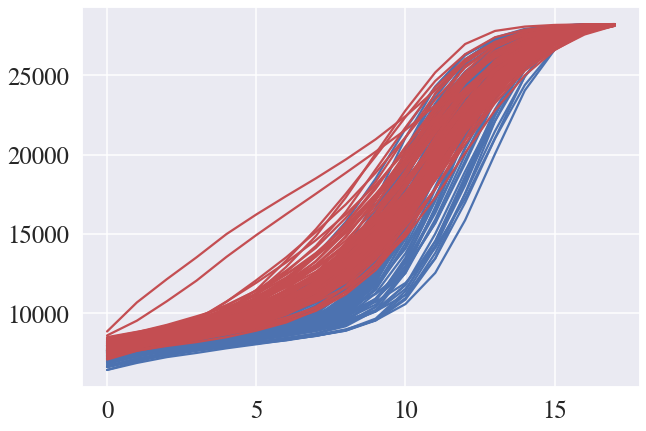

In [5]:
plt.plot(a.T,'b')
plt.plot(b.T,'r')

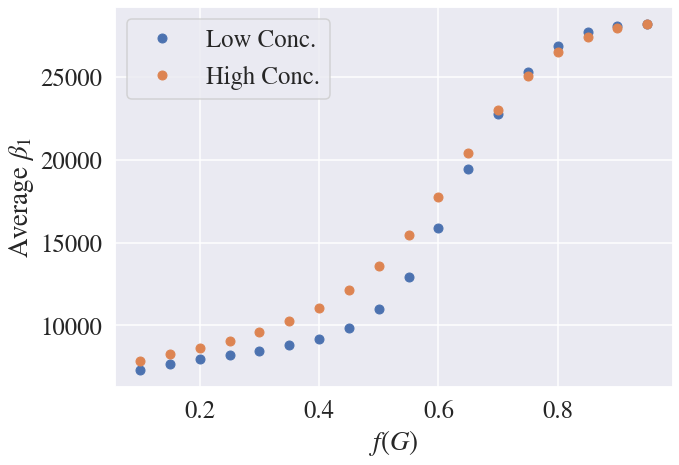

In [6]:
plt.plot(thresh,np.mean(a,axis = 0),'o', label = "Low Conc.")
plt.plot(thresh,np.mean(b,axis = 0),'o', label = "High Conc.")

plt.legend()

plt.xlabel("$f(G)$")
plt.ylabel(r"Average $\beta_1$")
plt.legend()

plt.savefig("beta1meansreal.pdf")

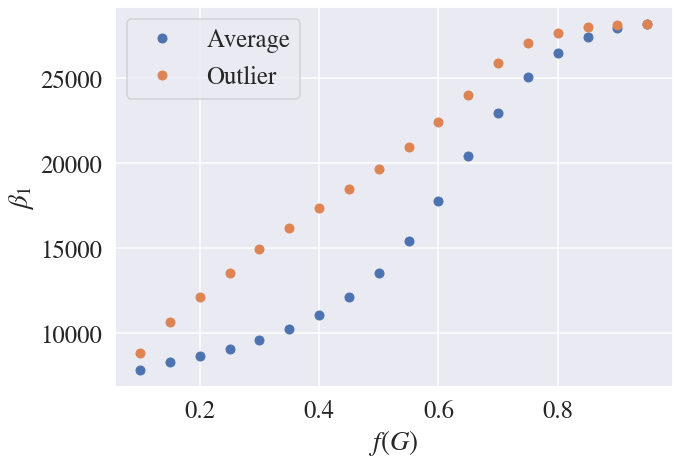

In [63]:
plt.plot(thresh,np.mean(b,axis = 0),'o', label = "Average")
plt.plot(thresh,b[4].T,'o',label = "Outlier")
plt.legend()
plt.xlabel("$f(G)$")
plt.ylabel(r"$\beta_1$")

plt.savefig("avgvsoutlier.pdf")

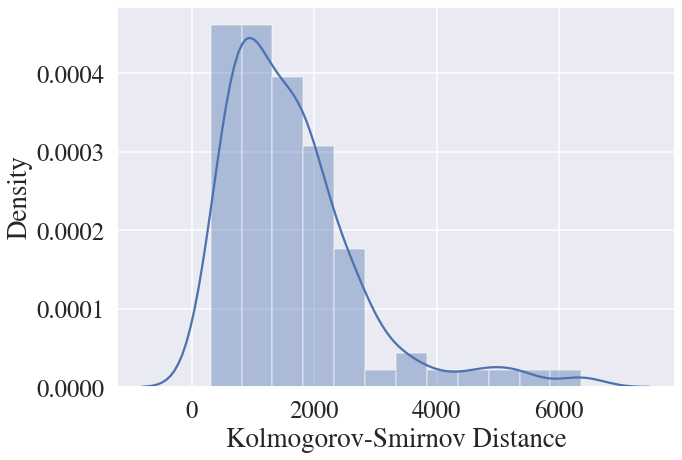

In [61]:
kss = []
mean = np.mean(b,axis = 0)
for i in b:
    ks = np.max(np.absolute(i - mean))
    kss.append(ks)
        
sns.distplot(kss)
plt.ylabel("Density")
plt.xlabel("Kolmogorov-Smirnov Distance")
plt.savefig("outlierdist.svg")

In [6]:
def logistic(t,a,b,c):
    return c/(1+a*np.exp(-b*t))

thresh = np.arange(0.1,1,.05)

def fit_log(Data,thresh):
    x = thresh
    params = []
    for i in range(len(Data)):
        p0 = np.random.exponential(size = 3)
        bounds = (0,[1000000000,30,20000])
        x = thresh
        y = Data[i]
        y = (y - y.min())/(y.max() - y.min())
        (a,b,c),cov = optim.curve_fit(logistic,x,y,bounds = bounds, p0=p0)
        param = [a,b,c]
        params.append(param)
    return params

In [7]:
params1 = fit_log(a,thresh)
params2 = fit_log(b,thresh)

In [8]:
param11 = np.vstack(params1).T
param22 = np.vstack(params2).T

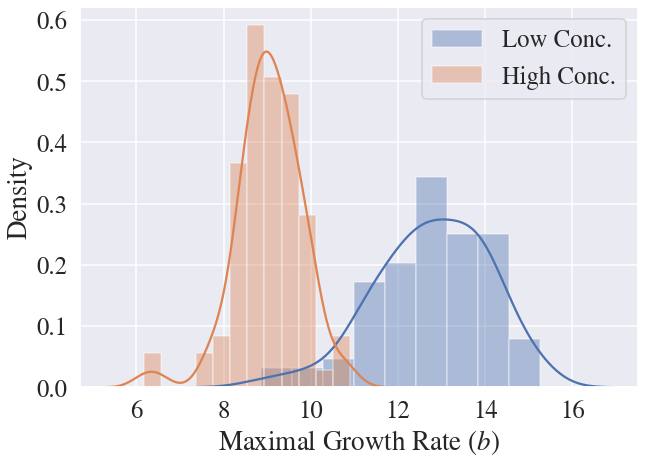

In [9]:
sns.distplot(param11[1,:],label = "Low Conc.")
sns.distplot(param22[1,:],label = "High Conc.")

plt.xlabel("Maximal Growth Rate ($b$)")
plt.ylabel("Density")

plt.legend()

plt.savefig("betadistreal.pdf")



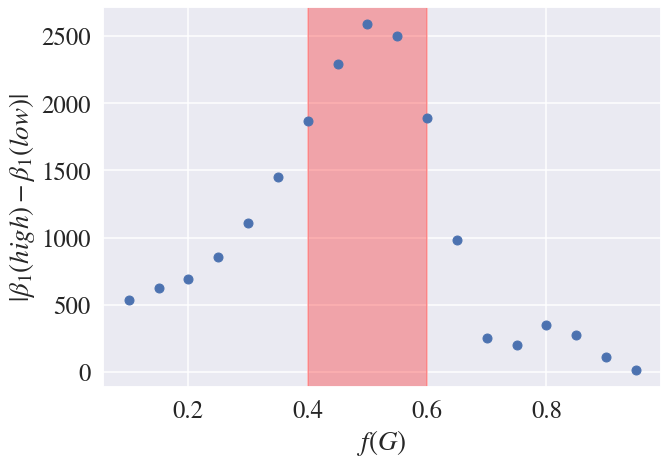

In [10]:
plt.plot(thresh,np.absolute(np.mean(a,axis = 0) - np.mean(b,axis = 0)),'o')
plt.ylabel(r"$|\beta_1(high) - \beta_1(low)|$")
plt.xlabel("$f(G)$")
plt.axvspan(.4, .6, color='red', alpha=0.3)
plt.savefig("diffplot.pdf")